<style>
td {
  text-align: center;
}

th {
  text-align: center;
}
</style>

# Image captioning with visual attention




Given an image like the example below, our goal is to generate a
caption such as "a surfer riding on a wave".

<table style="text-align: center;">
<tr>
  <td>
   
  </td>
</tr>
<tr>
    <td>
   <img src="https://tensorflow.org/images/surf.jpg"/>
  </td>
</tr>
</table>

The model architecture used here is inspired by [Show, Attend and Tell: Neural Image Caption Generation with Visual Attention](https://arxiv.org/abs/1502.03044), but has been updated to use a 2-layer Transformer-decoder.

The model architecture built in this tutorial is shown below. Features are extracted from the image, and passed to the cross-attention layers of the Transformer-decoder.

<table>
<tr>
  <th>The model architecture</th>
</tr>
<tr>
  <td>
   <img width=400 src="https://tensorflow.org/images/tutorials/transformer/ImageCaptioning.png"/>
  </td>
</tr>
</table>

The transformer decoder is mainly built from attention layers. It uses self-attention to process the sequence being generated, and it uses cross-attention to attend to the image.

By inspecting the attention weights of the cross attention layers you will see what parts of the image the model is looking at as it generates words.

![Prediction](https://tensorflow.org/images/imcap_prediction.png)





---

**Title:**

**“Automated Image Captioning using Transformer-Based Visual Attention Networks”**

---

### Abstract:

This project presents an automated image captioning system utilizing a Transformer-based architecture for generating accurate and meaningful descriptions of images. Building on the foundational "Show, Attend, and Tell" methodology, this model introduces improvements by using a two-layer Transformer-decoder architecture that dynamically attends to different parts of an image while constructing captions. The model has been trained using an image-caption dataset, leveraging state-of-the-art deep learning techniques. The results demonstrate the model's capacity to generate context-aware captions that align with the visual content of images.

---

### 1. Introduction:

Image captioning is an advanced task in computer vision that aims to generate descriptive captions for images. It is a multimodal problem combining natural language processing (NLP) and computer vision. This project implements an improved version of the "Show, Attend, and Tell" model, incorporating a Transformer-based architecture. The task of image captioning has numerous applications, from aiding visually impaired individuals to enhancing image search engines and archiving.

**Objective:** The goal of this project is to develop a model that generates meaningful captions by attending to important regions in an image and converting those visual cues into natural language descriptions.

**Motivation:** Existing methods, such as RNN-based image captioning, have limitations in generating longer and contextually coherent captions. Transformer architectures, by incorporating self-attention mechanisms, can overcome these limitations, making them a powerful tool for image captioning.

---

### 2. Dataset:

The dataset used in this project is a well-known image-captioning dataset that pairs images with corresponding descriptions. The dataset includes a vast range of images, each annotated with one or more descriptive sentences, ensuring diversity and coverage across a wide array of contexts.

**Key Dataset Attributes**:
- **Images**: The dataset consists of high-resolution images from real-world scenarios (e.g., COCO dataset).
- **Captions**: Each image is annotated with one or more human-written captions. These captions serve as the ground truth during the training process.
- **Preprocessing**: The images are resized and normalized before being fed into the model. The captions are tokenized and converted into a sequence of embeddings.

---

### 3. Model Architecture:

The project adopts a two-layer Transformer-decoder architecture for generating captions. This architecture includes several components:

- **Feature Extraction**: A pre-trained Convolutional Neural Network (CNN) (e.g., ResNet or InceptionNet) is used to extract features from the images. These features serve as the input to the Transformer.
  
- **Transformer-Decoder**: The core of the model is the Transformer-decoder, which is made up of:
  - **Self-Attention Layers**: These layers allow the model to attend to different parts of the generated caption, ensuring that each word is contextually related to the preceding words.
  - **Cross-Attention Layers**: These layers allow the model to attend to different regions of the image while generating each word in the caption.
  
- **Positional Encoding**: Since Transformers do not have a sense of order, positional encodings are added to the input embeddings to introduce the notion of sequence order.

**Training Strategy**: The model is trained using a categorical cross-entropy loss, which compares the predicted words with the actual captions. The Adam optimizer is used to minimize the loss.

---

### 4. Methodology:

1. **Data Preprocessing**:
   - **Image Preprocessing**: All images are resized to a fixed dimension and normalized to ensure consistency in the input.
   - **Caption Tokenization**: Captions are tokenized into words, and each word is converted into an embedding using pre-trained word embeddings.
   
2. **Feature Extraction**:
   - A pre-trained CNN (such as ResNet) extracts image features that are passed to the Transformer-decoder.

3. **Transformer Decoder**:
   - The Transformer-decoder takes the image features as input, alongside the caption embeddings. The self-attention mechanism helps the model understand relationships between words in the sequence, while the cross-attention mechanism attends to different image regions based on the caption generation.

4. **Training**:
   - The model is trained by passing image-caption pairs through the network. For each image, the model generates a caption word by word, attending to the relevant parts of the image. The loss is computed by comparing the generated captions with the ground-truth captions, and backpropagation is used to update the model's weights.

5. **Evaluation**:
   - The model’s performance is evaluated using common metrics in image captioning, such as BLEU scores, which measure the overlap between the generated captions and the ground-truth captions.

---

### 5. Results:

The model is capable of generating coherent and context-aware captions that correspond well with the visual content of images. Below are some of the performance metrics used for evaluation:

- **BLEU Score**: A measure of how closely the generated captions align with the reference captions.
- **Qualitative Results**: In addition to quantitative metrics, the model's output captions are manually reviewed to ensure they make sense in the context of the images. Example outputs show captions like "a person riding a horse on a beach" or "a dog playing with a ball in a park," which demonstrate the model's ability to capture key elements of an image.

---

### 6. Conclusion:

This project successfully implements a Transformer-based image captioning model that leverages visual attention mechanisms to generate accurate and meaningful descriptions of images. The use of cross-attention in the Transformer-decoder allows the model to focus on relevant parts of the image while generating captions. Future improvements can include training on larger datasets and using more advanced feature extraction techniques to further enhance caption accuracy.

---



## Setup

In [ ]:
!pip uninstall -y tensorflow estimator keras

Found existing installation: tensorflow 2.17.0
Uninstalling tensorflow-2.17.0:
  Successfully uninstalled tensorflow-2.17.0
Found existing installation: keras 3.4.1
Uninstalling keras-3.4.1:
  Successfully uninstalled keras-3.4.1


In [ ]:
!pip install --allow-change-held-packages libcudnn8=8.6.0.163-1+cuda11.8


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: --allow-change-held-packages


In [ ]:
!pip install tensorflow-text==2.10.0




INFO: pip is looking at multiple versions of tf-keras to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.1/578.1 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 69.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 62.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 82.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 35.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 81.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 108.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 50.7 MB/s eta 0:00:00
  Attempting uninstall: tf-keras
    Found existing installation: tf_ker

In [ ]:
!pip install einops
!pip install tensorflow


In [ ]:
!pip install tensorflow-hub

In [ ]:
!pip install tensorflow-text

In [ ]:
!pip install tensorflow-text


In [ ]:
#@title
import concurrent.futures
import collections
import dataclasses
import hashlib
import itertools
import json
import math
import os
import pathlib
import random
import re
import string
import time
import urllib.request

import einops
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image
import requests
!pip install tqdm
import tqdm

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
import tensorflow_datasets as tfds

ERROR:absl:cannot import name 'builder' from 'google.protobuf.internal' (/usr/local/lib/python3.10/dist-packages/google/protobuf/internal/__init__.py)
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/tensorflow_datasets/__init__.py", line 79, in <module>
    from tensorflow_datasets import rlds  # pylint: disable=g-bad-import-order
  File "/usr/local/lib/python3.10/dist-packages/tensorflow_datasets/rlds/__init__.py", line 21, in <module>
    from tensorflow_datasets.rlds import envlogger_reader
  File "/usr/local/lib/python3.10/dist-packages/tensorflow_datasets/rlds/envlogger_reader.py", line 21, in <module>
    from tensorflow_datasets.core.utils.lazy_imports_utils import tree
  File "/usr/local/lib/python3.10/dist-packages/tensorflow_datasets/core/__init__.py", line 22, in <module>
    from tensorflow_datasets.core import community
  File "/usr/local/lib/python3.10/dist-packages/tensorflow_datasets/core/community/__init__.py", line 19, in <module>
  

##  Data handling

This section downloads a captions dataset and prepares it for training. It tokenizes the input text, and caches the results of running all the images through a pretrained feature-extractor model. It's not critical to understand everything in this section.

 <section class="expandable tfo-display-only-on-site">
 <button type="button" class="button-red button expand-control">Toggle section</button>


#### Flickr8k

In [ ]:
def flickr8k(path='flickr8k'):
  path = pathlib.Path(path)

  if len(list(path.rglob('*'))) < 16197:
    tf.keras.utils.get_file(
        origin='https://github.com/jbrownlee/Datasets/releases/download/Flickr8k/Flickr8k_Dataset.zip',
        cache_dir='.',
        cache_subdir=path,
        extract=True)
    tf.keras.utils.get_file(
        origin='https://github.com/jbrownlee/Datasets/releases/download/Flickr8k/Flickr8k_text.zip',
        cache_dir='.',
        cache_subdir=path,
        extract=True)

  captions = (path/"Flickr8k.token.txt").read_text().splitlines()
  captions = (line.split('\t') for line in captions)
  captions = ((fname.split('#')[0], caption) for (fname, caption) in captions)

  cap_dict = collections.defaultdict(list)
  for fname, cap in captions:
    cap_dict[fname].append(cap)

  train_files = (path/'Flickr_8k.trainImages.txt').read_text().splitlines()
  train_captions = [(str(path/'Flicker8k_Dataset'/fname), cap_dict[fname]) for fname in train_files]

  test_files = (path/'Flickr_8k.testImages.txt').read_text().splitlines()
  test_captions = [(str(path/'Flicker8k_Dataset'/fname), cap_dict[fname]) for fname in test_files]

  train_ds = tf.data.experimental.from_list(train_captions)
  test_ds = tf.data.experimental.from_list(test_captions)

  return train_ds, test_ds

#### Conceptual Captions

In [ ]:
def conceptual_captions(*, data_dir="conceptual_captions", num_train, num_val):
  def iter_index(index_path):
    with open(index_path) as f:
      for line in f:
        caption, url = line.strip().split('\t')
        yield caption, url

  def download_image_urls(data_dir, urls):
    ex = concurrent.futures.ThreadPoolExecutor(max_workers=100)
    def save_image(url):
      hash = hashlib.sha1(url.encode())
      # Name the files after the hash of the URL.
      file_path = data_dir/f'{hash.hexdigest()}.jpeg'
      if file_path.exists():
        # Only download each file once.
        return file_path

      try:
        result = requests.get(url, timeout=5)
      except Exception:
        file_path = None
      else:
        file_path.write_bytes(result.content)
      return file_path

    result = []
    out_paths = ex.map(save_image, urls)
    for file_path in tqdm.tqdm(out_paths, total=len(urls)):
      result.append(file_path)

    return result

  def ds_from_index_file(index_path, data_dir, count):
    data_dir.mkdir(exist_ok=True)
    index = list(itertools.islice(iter_index(index_path), count))
    captions = [caption for caption, url in index]
    urls = [url for caption, url in index]

    paths = download_image_urls(data_dir, urls)

    new_captions = []
    new_paths = []
    for cap, path in zip(captions, paths):
      if path is None:
        # Download failed, so skip this pair.
        continue
      new_captions.append(cap)
      new_paths.append(path)

    new_paths = [str(p) for p in new_paths]

    ds = tf.data.Dataset.from_tensor_slices((new_paths, new_captions))
    ds = ds.map(lambda path,cap: (path, cap[tf.newaxis])) # 1 caption per image
    return ds

  data_dir = pathlib.Path(data_dir)
  train_index_path = tf.keras.utils.get_file(
    origin='https://storage.googleapis.com/gcc-data/Train/GCC-training.tsv',
    cache_subdir=data_dir,
    cache_dir='.')

  val_index_path = tf.keras.utils.get_file(
    origin='https://storage.googleapis.com/gcc-data/Validation/GCC-1.1.0-Validation.tsv',
    cache_subdir=data_dir,
    cache_dir='.')

  train_raw = ds_from_index_file(train_index_path, data_dir=data_dir/'train', count=num_train)
  test_raw = ds_from_index_file(val_index_path, data_dir=data_dir/'val', count=num_val)

  return train_raw, test_raw

#### Download the dataset

The Flickr8k is a good choice because it contains 5-captions per image, more data for a smaller download.

In [ ]:
choose = 'flickr8k'

if choose == 'flickr8k':
  train_raw, test_raw = flickr8k()
else:
  train_raw, test_raw = conceptual_captions(num_train=10000, num_val=5000)

2340801/2340801 [==============================] - 0s 0us/step


The loaders for both datasets above return `tf.data.Dataset`s containing `(image_path, captions)` pairs. The Flickr8k dataset contains 5 captions per image, while Conceptual Captions has 1:

In [ ]:
train_raw.element_spec

(TensorSpec(shape=(), dtype=tf.string, name=None),
 TensorSpec(shape=(5,), dtype=tf.string, name=None))

In [ ]:
for ex_path, ex_captions in train_raw.take(1):
  print(ex_path)
  print(ex_captions)

tf.Tensor(b'flickr8k/Flicker8k_Dataset/2513260012_03d33305cf.jpg', shape=(), dtype=string)
tf.Tensor(
[b'A black dog is running after a white dog in the snow .'
 b'Black dog chasing brown dog through snow'
 b'Two dogs chase each other across the snowy ground .'
 b'Two dogs play together in the snow .'
 b'Two dogs running through a low lying body of water .'], shape=(5,), dtype=string)


### Image feature extractor

We will use an image model (pretrained on imagenet) to extract the features from each image. The model was trained as an image classifier, but setting `include_top=False` returns the model without the final classification layer, so you can use the last layer of feature-maps:  


In [ ]:
IMAGE_SHAPE=(224, 224, 3)
mobilenet = tf.keras.applications.MobileNetV3Small(
    input_shape=IMAGE_SHAPE,
    include_top=False,
    include_preprocessing=True)
mobilenet.trainable=False

4334752/4334752 [==============================] - 0s 0us/step


In [ ]:
def load_image(image_path):
    img = tf.io.read_file(image_path)
    img = tf.io.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, IMAGE_SHAPE[:-1])
    return img

The model returns a feature map for each image in the input batch:

In [ ]:
test_img_batch = load_image(ex_path)[tf.newaxis, :]

print(test_img_batch.shape)
print(mobilenet(test_img_batch).shape)

(1, 224, 224, 3)
(1, 7, 7, 576)


In [ ]:
def standardize(s):
  s = tf.strings.lower(s)
  s = tf.strings.regex_replace(s, f'[{re.escape(string.punctuation)}]', '')
  s = tf.strings.join(['[START]', s, '[END]'], separator=' ')
  return s

In [ ]:
# Use the top 5000 words for a vocabulary.
vocabulary_size = 5000
tokenizer = tf.keras.layers.TextVectorization(
    max_tokens=vocabulary_size,
    standardize=standardize,
    ragged=True)
# Learn the vocabulary from the caption data.

In [ ]:
tokenizer.adapt(train_raw.map(lambda fp,txt: txt).unbatch().batch(1024))

In [ ]:
tokenizer.get_vocabulary()[:10]

['', '[UNK]', 'a', '[START]', '[END]', 'in', 'the', 'on', 'is', 'and']

In [ ]:
t = tokenizer([['a cat in a hat'], ['a robot dog']])
t

<tf.RaggedTensor [[3, 2, 655, 5, 2, 97, 4], [3, 2, 1937, 10, 4]]>

In [ ]:
# Create mappings for words to indices and indices to words.
word_to_index = tf.keras.layers.StringLookup(
    mask_token="",
    vocabulary=tokenizer.get_vocabulary())
index_to_word = tf.keras.layers.StringLookup(
    mask_token="",
    vocabulary=tokenizer.get_vocabulary(),
    invert=True)

In [ ]:
w = index_to_word(t)
w.to_list()

[[b'[START]', b'a', b'cat', b'in', b'a', b'hat', b'[END]'],
 [b'[START]', b'a', b'robot', b'dog', b'[END]']]

In [ ]:
tf.strings.reduce_join(w, separator=' ', axis=-1).numpy()

array([b'[START] a cat in a hat [END]', b'[START] a robot dog [END]'],
      dtype=object)

### Prepare the datasets

The `train_raw` and `test_raw` datasets contain 1:many `(image, captions)` pairs.

This function will replicate the image so there are 1:1 images to captions:

In [ ]:
def match_shapes(images, captions):
  caption_shape = einops.parse_shape(captions, 'b c')
  captions = einops.rearrange(captions, 'b c -> (b c)')
  images = einops.repeat(
      images, 'b ... -> (b c) ...',
      c = caption_shape['c'])
  return images, captions

In [ ]:
for ex_paths, ex_captions in train_raw.batch(32).take(1):
  break

print('image paths:', ex_paths.shape)
print('captions:', ex_captions.shape)
print()

ex_paths, ex_captions = match_shapes(images=ex_paths, captions=ex_captions)

print('image_paths:', ex_paths.shape)
print('captions:', ex_captions.shape)


image paths: (32,)
captions: (32, 5)

image_paths: (160,)
captions: (160,)


In [ ]:
def prepare_txt(imgs, txts):
  tokens = tokenizer(txts)

  input_tokens = tokens[..., :-1]
  label_tokens = tokens[..., 1:]
  return (imgs, input_tokens), label_tokens

In [ ]:
def prepare_dataset(ds, tokenizer, batch_size=32, shuffle_buffer=1000):
  # Load the images and make batches.
  ds = (ds
        .shuffle(10000)
        .map(lambda path, caption: (load_image(path), caption))
        .apply(tf.data.experimental.ignore_errors())
        .batch(batch_size))

  def to_tensor(inputs, labels):
    (images, in_tok), out_tok = inputs, labels
    return (images, in_tok.to_tensor()), out_tok.to_tensor()

  return (ds
          .map(match_shapes, tf.data.AUTOTUNE)
          .unbatch()
          .shuffle(shuffle_buffer)
          .batch(batch_size)
          .map(prepare_txt, tf.data.AUTOTUNE)
          .map(to_tensor, tf.data.AUTOTUNE)
          )

You could install the feature extractor in your model and train on the datasets like this:

In [ ]:
train_ds = prepare_dataset(train_raw, tokenizer)
train_ds.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, None), dtype=tf.int64, name=None)),
 TensorSpec(shape=(None, None), dtype=tf.int64, name=None))

In [ ]:
test_ds = prepare_dataset(test_raw, tokenizer)
test_ds.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, None), dtype=tf.int64, name=None)),
 TensorSpec(shape=(None, None), dtype=tf.int64, name=None))

### Cache the image features

In [ ]:
def save_dataset(ds, save_path, image_model, tokenizer, shards=10, batch_size=32):
  # Load the images and make batches.
  ds = (ds
        .map(lambda path, caption: (load_image(path), caption))
        .apply(tf.data.experimental.ignore_errors())
        .batch(batch_size))

  # Run the feature extractor on each batch
  # Don't do this in a .map, because tf.data runs on the CPU.
  def gen():
    for (images, captions) in tqdm.tqdm(ds):
      feature_maps = image_model(images)

      feature_maps, captions = match_shapes(feature_maps, captions)
      yield feature_maps, captions

  # Wrap the generator in a new tf.data.Dataset.
  new_ds = tf.data.Dataset.from_generator(
      gen,
      output_signature=(
          tf.TensorSpec(shape=image_model.output_shape),
          tf.TensorSpec(shape=(None,), dtype=tf.string)))

  # Apply the tokenization
  new_ds = (new_ds
            .map(prepare_txt, tf.data.AUTOTUNE)
            .unbatch()
            .shuffle(1000))

  # Save the dataset into shard files.
  def shard_func(i, item):
    return i % shards
  new_ds.enumerate().save(save_path, shard_func=shard_func)

def load_dataset(save_path, batch_size=32, shuffle=1000, cycle_length=2):
  def custom_reader_func(datasets):
    datasets = datasets.shuffle(1000)
    return datasets.interleave(lambda x: x, cycle_length=cycle_length)

  ds = tf.data.Dataset.load(save_path, reader_func=custom_reader_func)

  def drop_index(i, x):
    return x

  ds = (ds
        .map(drop_index, tf.data.AUTOTUNE)
        .shuffle(shuffle)
        .padded_batch(batch_size)
        .prefetch(tf.data.AUTOTUNE))
  return ds

In [ ]:
save_dataset(train_raw, 'train_cache', mobilenet, tokenizer)
save_dataset(test_raw, 'test_cache', mobilenet, tokenizer)

188it [02:19,  1.34it/s]
32it [00:21,  1.52it/s]


 </section>


## Data ready for training

After those preprocessing steps, here are the datasets:

In [ ]:
train_ds = load_dataset('train_cache')
test_ds = load_dataset('test_cache')

In [ ]:
train_ds.element_spec

((TensorSpec(shape=(None, 7, 7, 576), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, None), dtype=tf.int64, name=None)),
 TensorSpec(shape=(None, None), dtype=tf.int64, name=None))

In [ ]:
for (inputs, ex_labels) in train_ds.take(1):
  (ex_img, ex_in_tok) = inputs

print(ex_img.shape)
print(ex_in_tok.shape)
print(ex_labels.shape)

(32, 7, 7, 576)
(32, 24)
(32, 24)


In [ ]:
print(ex_in_tok[0].numpy())
print(ex_labels[0].numpy())

[  3  45  46 155  92 242 230 122   7 131   0   0   0   0   0   0   0   0
   0   0   0   0   0   0]
[ 45  46 155  92 242 230 122   7 131   4   0   0   0   0   0   0   0   0
   0   0   0   0   0   0]


## A Transformer decoder model

This model assumes that the pretrained image encoder is sufficient, and just focuses on building the text decoder. This tutorial uses a 2-layer Transformer-decoder.




<table>
<tr>
  <th>The Transformer encoder and decoder.</th>
</tr>
<tr>
  <td>
   <img width=400 src="https://www.tensorflow.org/images/tutorials/transformer/Transformer-1layer-words.png"/>
  </td>
</tr>
</table>

### Input

### Decoder

In [ ]:
class SeqEmbedding(tf.keras.layers.Layer):
  def __init__(self, vocab_size, max_length, depth):
    super().__init__()
    self.pos_embedding = tf.keras.layers.Embedding(input_dim=max_length, output_dim=depth)

    self.token_embedding = tf.keras.layers.Embedding(
        input_dim=vocab_size,
        output_dim=depth,
        mask_zero=True)

    self.add = tf.keras.layers.Add()

  def call(self, seq):
    seq = self.token_embedding(seq) # (batch, seq, depth)

    x = tf.range(tf.shape(seq)[1])  # (seq)
    x = x[tf.newaxis, :]  # (1, seq)
    x = self.pos_embedding(x)  # (1, seq, depth)

    return self.add([seq,x])

The decoder is a standard Transformer-decoder, it contains a stack of `DecoderLayers` where each contains three sublayers: a `CausalSelfAttention`, a `CrossAttention`, and a`FeedForward`. The implementations are almost identical to the [Transformer tutorial](https://www.tensorflow.org/text/tutorials/transformer), refer to it for more details.

The `CausalSelfAttention` layer is below:

In [ ]:
class CausalSelfAttention(tf.keras.layers.Layer):
  def __init__(self, **kwargs):
    super().__init__()
    self.mha = tf.keras.layers.MultiHeadAttention(**kwargs)
    # Use Add instead of + so the keras mask propagates through.
    self.add = tf.keras.layers.Add()
    self.layernorm = tf.keras.layers.LayerNormalization()

  def call(self, x):
    attn = self.mha(query=x, value=x,
                    use_causal_mask=True)
    x = self.add([x, attn])
    return self.layernorm(x)


The `CrossAttention` layer is below. Note the use of `return_attention_scores`.

In [ ]:
class CrossAttention(tf.keras.layers.Layer):
  def __init__(self,**kwargs):
    super().__init__()
    self.mha = tf.keras.layers.MultiHeadAttention(**kwargs)
    self.add = tf.keras.layers.Add()
    self.layernorm = tf.keras.layers.LayerNormalization()

  def call(self, x, y, **kwargs):
    attn, attention_scores = self.mha(
             query=x, value=y,
             return_attention_scores=True)

    self.last_attention_scores = attention_scores

    x = self.add([x, attn])
    return self.layernorm(x)

The `FeedForward` layer is below. Remember that a `layers.Dense` layer is applied to the last axis of the input. The input will have a shape of `(batch, sequence, channels)`, so it automatically applies pointwise across the `batch` and `sequence` axes.  

In [ ]:
class FeedForward(tf.keras.layers.Layer):
  def __init__(self, units, dropout_rate=0.1):
    super().__init__()
    self.seq = tf.keras.Sequential([
        tf.keras.layers.Dense(units=2*units, activation='relu'),
        tf.keras.layers.Dense(units=units),
        tf.keras.layers.Dropout(rate=dropout_rate),
    ])

    self.layernorm = tf.keras.layers.LayerNormalization()

  def call(self, x):
    x = x + self.seq(x)
    return self.layernorm(x)


Next arrange these three layers into a larger `DecoderLayer`. Each decoder layer applies the three smaller layers in sequence. After each sublayer the shape of `out_seq` is `(batch, sequence, channels)`. The decoder layer also returns the `attention_scores` for later visualizations.

In [ ]:
class DecoderLayer(tf.keras.layers.Layer):
  def __init__(self, units, num_heads=1, dropout_rate=0.1):
    super().__init__()

    self.self_attention = CausalSelfAttention(num_heads=num_heads,
                                              key_dim=units,
                                              dropout=dropout_rate)
    self.cross_attention = CrossAttention(num_heads=num_heads,
                                          key_dim=units,
                                          dropout=dropout_rate)
    self.ff = FeedForward(units=units, dropout_rate=dropout_rate)


  def call(self, inputs, training=False):
    in_seq, out_seq = inputs

    # Text input
    out_seq = self.self_attention(out_seq)

    out_seq = self.cross_attention(out_seq, in_seq)

    self.last_attention_scores = self.cross_attention.last_attention_scores

    out_seq = self.ff(out_seq)

    return out_seq

### Output

At minimum the output layer needs a `layers.Dense` layer to generate logit-predictions for each token at each location.

But there are a few other features you can add to make this work a little better:

1. **Handle bad tokens**: The model will be generating text. It should
   never generate a pad, unknown, or start token (`''`, `'[UNK]'`,
   `'[START]'`). So set the bias for these to a large negative value.

   > Note: You'll need to ignore these tokens in the loss function as well.

2. **Smart initialization**: The default initialization of a dense layer will
  give a model that initially predicts each token with almost uniform
  likelihood. The actual token distribution is far from uniform. The
  optimal value for the initial bias of the output layer is the log of the
  probability of each token. So include an `adapt` method to count the tokens
  and set the optimal initial bias. This reduces the initial loss from the
  entropy of the uniform distribution (`log(vocabulary_size)`) to the marginal
  entropy of the distribution (`-p*log(p)`).


In [ ]:
#@title
class TokenOutput(tf.keras.layers.Layer):
  def __init__(self, tokenizer, banned_tokens=('', '[UNK]', '[START]'), **kwargs):
    super().__init__()

    self.dense = tf.keras.layers.Dense(
        units=tokenizer.vocabulary_size(), **kwargs)
    self.tokenizer = tokenizer
    self.banned_tokens = banned_tokens

    self.bias = None

  def adapt(self, ds):
    counts = collections.Counter()
    vocab_dict = {name: id
                  for id, name in enumerate(self.tokenizer.get_vocabulary())}

    for tokens in tqdm.tqdm(ds):
      counts.update(tokens.numpy().flatten())

    counts_arr = np.zeros(shape=(self.tokenizer.vocabulary_size(),))
    counts_arr[np.array(list(counts.keys()), dtype=np.int32)] = list(counts.values())

    counts_arr = counts_arr[:]
    for token in self.banned_tokens:
      counts_arr[vocab_dict[token]] = 0

    total = counts_arr.sum()
    p = counts_arr/total
    p[counts_arr==0] = 1.0
    log_p = np.log(p)  # log(1) == 0

    entropy = -(log_p*p).sum()

    print()
    print(f"Uniform entropy: {np.log(self.tokenizer.vocabulary_size()):0.2f}")
    print(f"Marginal entropy: {entropy:0.2f}")

    self.bias = log_p
    self.bias[counts_arr==0] = -1e9

  def call(self, x):
    x = self.dense(x)
    # TODO(b/250038731): Fix this.
    # An Add layer doesn't work because of the different shapes.
    # This clears the mask, that's okay because it prevents keras from rescaling
    # the losses.
    return x + self.bias


The smart initialization will significantly reduce the initial loss:

In [ ]:
output_layer = TokenOutput(tokenizer, banned_tokens=('', '[UNK]', '[START]'))
# This might run a little faster if the dataset didn't also have to load the image data.
output_layer.adapt(train_ds.map(lambda inputs, labels: labels))

100%|██████████| 938/938 [00:10<00:00, 91.43it/s] 


Uniform entropy: 8.52
Marginal entropy: 5.29


### Build the model

To build the model, you need to combine several parts:

1. The image `feature_extractor` and the text `tokenizer` and.
1. The `seq_embedding` layer, to convert batches of token-IDs to
   vectors `(batch, sequence, channels)`.
3. The stack of `DecoderLayers` layers that will process the text and image data.
4. The `output_layer` which returns a pointwise prediction of what the next word should be.

In [ ]:
class Captioner(tf.keras.Model):
  @classmethod
  def add_method(cls, fun):
    setattr(cls, fun.__name__, fun)
    return fun

  def __init__(self, tokenizer, feature_extractor, output_layer, num_layers=1,
               units=256, max_length=50, num_heads=1, dropout_rate=0.1):
    super().__init__()
    self.feature_extractor = feature_extractor
    self.tokenizer = tokenizer
    self.word_to_index = tf.keras.layers.StringLookup(
        mask_token="",
        vocabulary=tokenizer.get_vocabulary())
    self.index_to_word = tf.keras.layers.StringLookup(
        mask_token="",
        vocabulary=tokenizer.get_vocabulary(),
        invert=True)

    self.seq_embedding = SeqEmbedding(
        vocab_size=tokenizer.vocabulary_size(),
        depth=units,
        max_length=max_length)

    self.decoder_layers = [
        DecoderLayer(units, num_heads=num_heads, dropout_rate=dropout_rate)
        for n in range(num_layers)]

    self.output_layer = output_layer

When you call the model, for training, it receives an `image, txt` pair. To make this function more usable, be flexible about the input:

* If the image has 3 channels run it through the feature_extractor. Otherwise assume that it has been already. Similarly
* If the text has dtype `tf.string` run it through the tokenizer.

After that running the model is only a few steps:

1. Flatten the extracted image features, so they can be input to the decoder layers.
2. Look up the token embeddings.
3. Run the stack of `DecoderLayer`s, on the image features and text embeddings.
4. Run the output layer to predict the next token at each position.


In [ ]:
  @Captioner.add_method
  def call(self, inputs):
    image, txt = inputs

    if image.shape[-1] == 3:
      # Apply the feature-extractor, if you get an RGB image.
      image = self.feature_extractor(image)

    # Flatten the feature map
    image = einops.rearrange(image, 'b h w c -> b (h w) c')


    if txt.dtype == tf.string:
      # Apply the tokenizer if you get string inputs.
      txt = tokenizer(txt)

    txt = self.seq_embedding(txt)

    # Look at the image
    for dec_layer in self.decoder_layers:
      txt = dec_layer(inputs=(image, txt))

    txt = self.output_layer(txt)

    return txt

In [ ]:
model = Captioner(tokenizer, feature_extractor=mobilenet, output_layer=output_layer,
                  units=256, dropout_rate=0.5, num_layers=2, num_heads=2)

### Generate captions

Before getting into training, write a bit of code to generate captions. You'll use this to see how training is progressing.

Start by downloading a test image:

In [ ]:
image_url = 'https://media.istockphoto.com/id/1040907120/photo/young-girl-surfing-at-sunset.jpg?s=612x612&w=0&k=20&c=Q6h0zN4phcB9atvhUZu7nM3m_E2CpeKY8bphaKY2jbI='
image_path = tf.keras.utils.get_file('surf.jpg', origin=image_url)
image = load_image(image_path)

42185/42185 [==============================] - 0s 0us/step


To caption an image with this model:

- Extract the `img_features`
- Initialize the list of output tokens with a `[START]` token.
- Pass `img_features` and `tokens` into the model.
  - It returns a list of logits.
  - Choose the next token based on those logits.  
  - Add it to the list of tokens, and continue the loop.
  - If it generates an `'[END]'` token, break out of the loop.

So add a "simple" method to do just that:

In [ ]:
@Captioner.add_method
def simple_gen(self, image, temperature=1):
  initial = self.word_to_index([['[START]']]) # (batch, sequence)
  img_features = self.feature_extractor(image[tf.newaxis, ...])

  tokens = initial # (batch, sequence)
  for n in range(50):
    preds = self((img_features, tokens)).numpy()  # (batch, sequence, vocab)
    preds = preds[:,-1, :]  #(batch, vocab)
    if temperature==0:
        next = tf.argmax(preds, axis=-1)[:, tf.newaxis]  # (batch, 1)
    else:
        next = tf.random.categorical(preds/temperature, num_samples=1)  # (batch, 1)
    tokens = tf.concat([tokens, next], axis=1) # (batch, sequence)

    if next[0] == self.word_to_index('[END]'):
      break
  words = index_to_word(tokens[0, 1:-1])
  result = tf.strings.reduce_join(words, axis=-1, separator=' ')
  return result.numpy().decode()

Here are some generated captions for that image, the model's untrained, so they don't make much sense yet:

In [ ]:
for t in (0.0, 0.5, 1.0):
  result = model.simple_gen(image, temperature=t)
  print(result)

a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a
a a the
while sitting woman with with is a from others


The temperature parameter allows you to interpolate between 3 modes:

1. Greedy decoding (`temperature=0.0`) - Chooses the most likely next token at each step.
2. Random sampling according to the logits (`temperature=1.0`).
3. Uniform random sampling (`temperature >> 1.0`).

Since the model is untrained, and it used the frequency-based initialization, the "greedy" output (first) usually only contains the most common tokens: `['a', '.', '[END]']`.

## Train

To train the model we have used additional components:

- The Loss and metrics
- The Optimizer
- Optional Callbacks

### Losses and metrics

In [ ]:
def masked_loss(labels, preds):
  loss = tf.nn.sparse_softmax_cross_entropy_with_logits(labels, preds)

  mask = (labels != 0) & (loss < 1e8)
  mask = tf.cast(mask, loss.dtype)

  loss = loss*mask
  loss = tf.reduce_sum(loss)/tf.reduce_sum(mask)
  return loss

def masked_acc(labels, preds):
  mask = tf.cast(labels!=0, tf.float32)
  preds = tf.argmax(preds, axis=-1)
  labels = tf.cast(labels, tf.int64)
  match = tf.cast(preds == labels, mask.dtype)
  acc = tf.reduce_sum(match*mask)/tf.reduce_sum(mask)
  return acc

### Callbacks

For feedback during training setup a `keras.callbacks.Callback` to generate some captions for the surfer image at the end of each epoch.

In [ ]:
class GenerateText(tf.keras.callbacks.Callback):
  def __init__(self):
    image_url = 'https://tensorflow.org/images/surf.jpg'
    image_path = tf.keras.utils.get_file('surf.jpg', origin=image_url)
    self.image = load_image(image_path)

  def on_epoch_end(self, epochs=None, logs=None):
    print()
    print()
    for t in (0.0, 0.5, 1.0):
      result = self.model.simple_gen(self.image, temperature=t)
      print(result)
    print()


In [ ]:
g = GenerateText()
g.model = model
g.on_epoch_end(0)



a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a





In [ ]:
callbacks = [
    GenerateText(),
    tf.keras.callbacks.EarlyStopping(
        patience=5, restore_best_weights=True)]

### Train

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
           loss=masked_loss,
           metrics=[masked_acc])

In [ ]:
history = model.fit(
    train_ds.repeat(),
    steps_per_epoch=100,
    validation_data=test_ds.repeat(),
    validation_steps=20,
    epochs=100,
    callbacks=callbacks)

Epoch 1/100
100/100 [==============================] - ETA: 0s - loss: 4.9896 - masked_acc: 0.2027

a man in a man in a man
a man is in the the in the a man
a man is over black on the the camera on a building with a walks

100/100 [==============================] - 53s 496ms/step - loss: 4.9896 - masked_acc: 0.2027 - val_loss: 4.6357 - val_masked_acc: 0.2466
Epoch 2/100
100/100 [==============================] - ETA: 0s - loss: 4.6434 - masked_acc: 0.2520

a man in a red is in a man in a red
a man in a man and a a a brown in the air
a at red rides a clouds

100/100 [==============================] - 47s 472ms/step - loss: 4.6434 - masked_acc: 0.2520 - val_loss: 4.3852 - val_masked_acc: 0.2673
Epoch 3/100
100/100 [==============================] - ETA: 0s - loss: 4.4038 - masked_acc: 0.2778

a girl in a red shirt is is running
a girl in a red water
a young brown young boy is is running in the playing in the yard

100/100 [==============================] - 48s 481ms/step - loss: 4.4038 -

Plot the loss and accuracy over the training run:

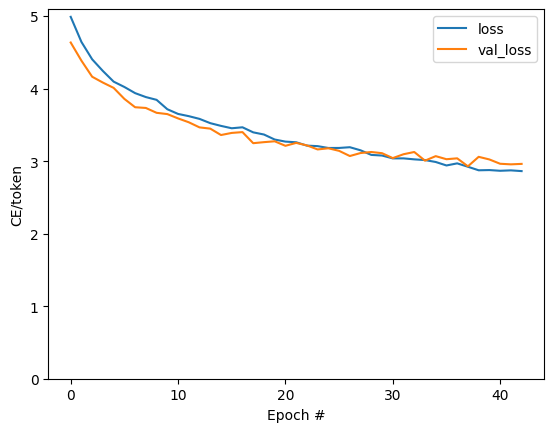

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.ylim([0, max(plt.ylim())])
plt.xlabel('Epoch #')
plt.ylabel('CE/token')
plt.legend()

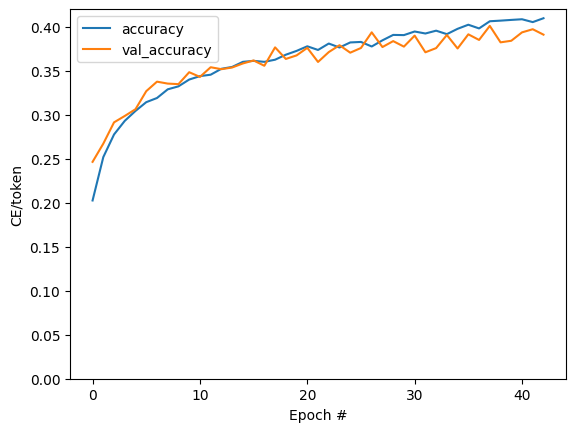

In [ ]:
plt.plot(history.history['masked_acc'], label='accuracy')
plt.plot(history.history['val_masked_acc'], label='val_accuracy')
plt.ylim([0, max(plt.ylim())])
plt.xlabel('Epoch #')
plt.ylabel('CE/token')
plt.legend()

## Attention plots

Now, using the trained model, we are runnig that `simple_gen` method on the image:

In [ ]:
result = model.simple_gen(image, temperature=0.0)
result

'a girl in a blue shirt is jumping into the water'

Spliting the output back into tokens:

In [ ]:
str_tokens = result.split()
str_tokens.append('[END]')

The `DecoderLayers` each cache the attention scores for their `CrossAttention` layer. The shape of each attention map is `(batch=1, heads, sequence, image)`:

In [ ]:
attn_maps = [layer.last_attention_scores for layer in model.decoder_layers]
[map.shape for map in attn_maps]

[TensorShape([1, 2, 12, 49]), TensorShape([1, 2, 12, 49])]

So stack the maps along the `batch` axis, then average over the `(batch, heads)` axes, while splitting the `image` axis back into `height, width`:


In [ ]:
attention_maps = tf.concat(attn_maps, axis=0)
attention_maps = einops.reduce(
    attention_maps,
    'batch heads sequence (height width) -> sequence height width',
    height=7, width=7,
    reduction='mean')

Now we have a single attention map, for each sequence prediction. The values in each map should sum to `1.`

In [ ]:
einops.reduce(attention_maps, 'sequence height width -> sequence', reduction='sum')

<tf.Tensor: shape=(12,), dtype=float32, numpy=
array([0.99999994, 0.99999994, 1.0000001 , 1.        , 1.        ,
       1.        , 0.99999994, 1.        , 1.        , 1.        ,
       1.        , 0.99999994], dtype=float32)>

So here is where the model was focusing attention while generating each token of the output:

In [ ]:
def plot_attention_maps(image, str_tokens, attention_map):
    fig = plt.figure(figsize=(16, 9))

    len_result = len(str_tokens)

    titles = []
    for i in range(len_result):
      map = attention_map[i]
      grid_size = max(int(np.ceil(len_result/2)), 2)
      ax = fig.add_subplot(3, grid_size, i+1)
      titles.append(ax.set_title(str_tokens[i]))
      img = ax.imshow(image)
      ax.imshow(map, cmap='gray', alpha=0.6, extent=img.get_extent(),
                clim=[0.0, np.max(map)])

    plt.tight_layout()

In [ ]:
plot_attention_maps(image/255, str_tokens, attention_maps)

In [ ]:
@Captioner.add_method
def run_and_show_attention(self, image, temperature=0.0):
  result_txt = self.simple_gen(image, temperature)
  str_tokens = result_txt.split()
  str_tokens.append('[END]')

  attention_maps = [layer.last_attention_scores for layer in self.decoder_layers]
  attention_maps = tf.concat(attention_maps, axis=0)
  attention_maps = einops.reduce(
      attention_maps,
      'batch heads sequence (height width) -> sequence height width',
      height=7, width=7,
      reduction='mean')

  plot_attention_maps(image/255, str_tokens, attention_maps)
  t = plt.suptitle(result_txt)
  t.set_y(1.05)


In [ ]:
run_and_show_attention(model, image)

## Image Input for testing

For practical here is the function to test the caption generator but since the dataset is small it may show inaccurate results.



In [ ]:
image_url = 'data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxIQEA8QEBIQDxUPDw8PDw8QFRcQDxAQFRUWFhUVFRUYHSggGBolHRUVITEhJSkrLi4uFx8zODMtNygtLisBCgoKDg0OFRAQGisdHR0tLS0tLS0tLS0rLS0tLS0rLSstKy0tLS0tLSstKystLSstLSstKy0tLS0tKystKy0rN//AABEIAKgBLAMBIgACEQEDEQH/xAAaAAACAwEBAAAAAAAAAAAAAAAAAQIDBAUG/8QAORAAAgECAgcFBgUFAQEBAAAAAAECERIDIQQxQVFhcZETFFKBoQVCkrHR8CJTYsHxIzJDcuGCwgb/xAAaAQEBAQEBAQEAAAAAAAAAAAAAAQIDBAUG/8QAJhEBAAICAQMEAwADAAAAAAAAAAERAhIDIUFRBBMxYQUUIjJCcf/aAAwDAQACEQMRAD8AjaO0nQdp95+WpXaFpZaNRBSu0aZZaFoWkVmNIaiSSDUSlbUhQtjITMw2rJJjSHYUgWkZQJRRK0yqlxFQtkiNppmYV0ChZQVCogBKg0glo1IMsoKgSbRQ6DoAIkqASFQi2TQUJUChVRoFCVB2gQoFCdoUIqtoiy1oi4lZlU0RoW2haGKVWhaW2BYDWVlo1EstChLaQUR0J0CgELQoToO0WqugULLQtAgOhK0EgtlaOKHQERbTjQlkQRJRMzDUSKIhPDLLaEZMQsz5UtCoWthaaYVUE0XPDIuJbSYV0FQsoFAiugKJZQKBEKBQnQKBUKBQnQdotYQoNRJxiWKBmZaiFNgrDQ4g1kS1pmcSFDQ4CsNWzMKbQoWOImhaUhQVCdBWlLaLSSgaewH2Jz2dfbll7MOzNPZB2Y2NGbswsNPZhYNjRnsBwNFgWDY1ZrA7M0WDsFpozWElAvsFaLNVVg1EstHaLWlTQrC60LRa0ocBWF9oWi01hQ0MttC0WlKXhohYabQtLZOLNYFpoUAsFs6M9gWmi0LRa6M9g1AvtCgs1hWoDSJ0C0jUFQToNoLSKg2QtLrQoW0pUoD7InQKCzVHsELskWJAS5WodJpCsRbaRcTzxL2TCp4RBwLWhWm4lzmIVWhQttC01bFKqBQttC0WUrtC0stC0WUqtC0ttC0tlKrQtLbQUK/Mk5RHyuOE5dIV0FQtWG9xJYEtxmeTCPmWo4c5+IZ7QsNy0GW1xXnX5DwvZslKUnNSTStSWrfmeLm/JcHHF7XPiHo4vQ8mc1MUwOArDqS0BbG06an9TLiYEo60+ew6+n9dw88fxl18OfN6Tk4/mOjJYHZl9oWnrt56UdmHZl9orRZqpsF2ZfaFos1UdmHZl9oWi01Z+zCw0WBYNl1Z+zDsy+0LRZqz2CtNNoWDY1lmtFaabBUGyaqLQtLmhUFlN9AtLKgee3spXYLsy0KC01hXYK0toKhdjVXYNQLKAkLTVXYFhbQKC11VWhYW0Cg2TVVYJ4VfujL6ASZtqMa+GbEwK65T8pNFE/Z8XrliPc72muh0KCtM6YT2b9zkj/aVGMpPOMqNaqqq5PgT9l6Q5RpLJ+8m07ZeWrkyy0qwJxU5RU1Wtzw005Ku21Znwvyno+HjwjPCKl9D0XNyZ5TjlNt2I8tfLejm6TjaQpUhZbdmnrca6kmqG6uunOmr0ZUzyfjPT8XNnO3Z29Xy58eMTizwlGbp/bJKrg9bW+O9DsJ4uCpKjXFNZNPensZn0jtkla4Taedyo5xrsdddOB+micsOnzD5c4Y8vX/GVlgWF9orTts8+im0LS6gUFpoptChc4itFmimgNF1AoLXVRQVC+0LRZqoaFQucQtLsmqm0LS20LRsaKXEVhfaKg2NEu8Q8UeqH3mHij1R47Na4v0+or34X6fUzUNby9l3qHij1Q+8w8UeqPHQxG/c9USk5eBrk0SoXbJ6/vEPFHqh94h4o9UeRVfB1aIu/ZGPmxMQby9h3iHij1Q1pEPFHqjxU1ibooIwxPFH0M9Grl7bvMPFHqg7zDxx+JHldGw4U/qNt71KNOlpvw3ou2E296lQl/UtdfMO33iHih8SDt4eKHxI4UsTR9mGv/U2/kjPjzw5L8KjDim38wT/ANh6XvEPHD4kLvEPFD4keVgoe9JPk8/kXKGj0zlieVH+xekJEzL0neIeKHxIO8w8UPiR5icdF8WkPyX0LMDEwIVopyT2YkFJeWRnZa+3ou8Q8cPiRzcfBwlidpGNGnSUkqpvJ1yeTWefMj3jBUb3h4aqnT8CW3W3T8PNnG072rZJyjiVT92MoSu/+l95nDlyjLpT08OM49beqxdInSsZQer+9Ono/qRwNKqv6rw4Sq8ouipsf4szw+J/+lxU6NU1ZbeGs6ehabCeEniqdZScqRlbFLVue7ecPT8GGGe2ONS6c+c5YVMvU95h44fEvqLvWH44fEvqeclPCplF83KvyRDR8RRdXV8K0R9C/p4ael73h+OHxL6h3vD8cPiX1PNY+kXN61XUlR0+pS5vdXy+gv6Kjy9X3vD8cPiX1DvmH+ZD4l9ThYWnNUphYPnBfUqWPJNtSnHk6R8hc+Co8vQvTML8yHxL6h33C/Mh8SPPaPoSxG2qvOrpr+hrXshfr6L6k3hdJdXvuF+ZD4kLv2F+ZD4kcPF0JRdHVcHSvzHDRIPY3xql+xdoTWXZ79hfmQ+JEo6XhvVOL5OpyVoMPDX/ANfQtho+Gv8AH6tknOuzUccz3bnpuH44dULv2F+ZDqjNZh+CPwolGWH4IfCjnPNXZuOD7ae8wpW5U37BvSIUrdHVXXsKliR8MOiJrGW6JPf+mv1/tKOkReqUeodohdvyGsZE/Ynwfrx5eWlPz8iiTXgZo7tJbH8ROODPZTzzPU8VMbz9z76Am9VnrQ2rR5cPUjHDprflmKVlc3sj61GnLbD1NsWl7yG2t+XP6IUjJCDfuepYsGnuo0XxSz+Tb+RHtoLY15UYFKWy2PNsST3xSrw+pe9Jw+ZW9Mj4R0a6q3CWySXH71j/ABbZx6f8Jd5hsS6C71wXQnQ6kpvxLyiDz99ryB6T/r5oT0h6sl5VJNLUpQqv8kuVE/mSbi8nV8aJFHbT2U+Ej2s/tUJcLUur7Psxf6U54mE1lFwkoum9ZZmLG9m9hNxldiSrliSp+KL1Gd3ula1TqmtaZ2tFxe8YU4Y9YdlFOGOsmt6kvI80xplt2eyM/cx1+JeP9q4X9d095ReeVNn7Hf0aChCMcsopVrt5mePsuM8SbxJSahBW25N5vPNZLIb0R/es6YZf3NOfLj/GNtLitdYrm/3Ifh8cepTHQW9WfkTh7Nb4fI3OU+HGMI8rqxX+XyTTF20ds69BL2XvaXqXx9lw31ETkuuKEceOrXX71Epwk1klTgqM0YeBCGxc9ZasZbqmr6dUrwzaLh4qyTtVdmVeh1e8zSypq1rX6sydrwK5aQ9r6GdcW4nJJpuVZVzdW9bLZSwk9T86pmOWkohGaeaTfH+DOWWMN4xl3h03OLyhRV3p5F89HXZ3Vimtq2+Rh0RKWtpPe6GusVlW4xEz2dJiK6st3Fj+8x4k0tVq8jPm9ZvLkqHPHjta2uBFN7qCSLEjjlyTLtjx0cSVRJDObbyrlPVc+rf7hdPxP1LXof6q+ZJaFxfme+nzdlHbSW19WEceXikuRp7n5jWicF6saylwqjjvxy+ZfHHfjfnRAtDX3UsWgLexUlodpPi/Ufay2qvNf8LY6Etj9aE1o1Nr+/Iozqf6eg6rc0a1hcK822WQwqbEvJhalgVu70JxUdyOgoPgSjhfaRLXViWF+lB2L8K+/I3vD5jsiLNWFaPLeuhLur3y8jZ2a1oEnvfUltasi0aXF86IcsOTahkoqkpOv90lqVOGvoaZKWxrr/whbvb8kJxjJYynGekHGFLktsUm+Ff5JKFN/QinR62k9apr6olLFitqMRERMy3MzOOMUHXc398yCk9kfkixSeVE89T2Ep6PN51y6MTnBGGStSnT+1LmyF09tOrSLFhU1py9f3yIvBzpRR5Zv0Me5Dccapt711bK3OuxnVwdAhSqTlnXOq60NGHoqWyKpXKlSTyS1HHDjYOjXcOe836H7NjX8dJbkmWTxoRyS5gvaDSooperM3MtVENHcsKKrass86GWWlrZBLi/+EJ6ZN7fQzt01s1EeUmfC7ExnL+7pQzzxNxByb5DSMZcldMWseO+shIkkIlE5fbpSSRNERpkEgAC2OJbPd1cf2JxU/0mpYUefNpfIsypmlluzfqfQ2fN0Y7ZbWlyzFY/FLkkmjZF7lTyQdqlq9FT5C5NYUwi90nzLKPdTyqO5vYlzYtWuXTIlytQlXYq+aSLI04Pg6P5GbtI7E5PjVkrpPUnH0I00X01R6Jgp12U/wBv5Mjg3rn5VqSsp4nyVP3CtU3xiuZV3haq9E/qUqf6G+dSSk+EeeSItJ9t/t0oJ4ldkvUr7SXjXkSU3tnXlUWtJLES2S9R9suJBNPb+5KMW6JOMq5JEmTVNaQqedCHb+fCho7jiZJxgs66/nSppj7PjTJJNvN56txznkns6xhHdRDQ3NJvLoX4miRS/Eqca5vmXw0dwVI5vpTkiEtHnLNya4HKZt0iKZMKWtQTk1uWolCOK3XONNh0tGwUkqKjpm974i0nR60lXUxSsUKqtaV2stjG6morePGP9v4nXN6vUrlpT2NR5Z/IkStOkqQVUczH02UntS4ZFTx5eKT9CuUql2hNZOUxqa4v0RCg0Pdlfbg5Sb4LchKJKgGJmZaiIgkhjQEJJIkhDKhoaEhkDQ6iFUDGpU1f8Jqbev5nPxMdRy18FmxLSG6UT4ntuHh1l0pYiW1cyHbbqPlmzJ2q25cNfyJRxE80nzadPUtmstLm+XNVYueZlliPYm+LovQdZ7a+pnZrRqb4epHPal5tsydrz6Cvrsb8xssYNGJpFuq3jk2RWkt+8l5U+ZGEa6oknhNLYt2Zm5+WqhdF195+ToO+K2y61IaLoksTVlxf7bzfgexZa5zS4LP5md2tGGWMtyNGDozklqjVVzzZ0sHQIRdFFNp63m+ZdTYybyukObH2XX3+iobMDRIwSaSrqrtfNl06RTrsz5Iqhjp1/C9rUm0kssuZiZbiF2e+mzy5lsEtvqYnOrVJJ1dPP+SvtpQdMpLOu95ktadFw/klGL1VXAyw0pJOjzedHklwMelaU26p256lr67ha06zlHDi3JqurXtOZpemp0t8+Pkc/ExHJ1bb5iRmcl1XrGrrVeCyoSeMtiM8SRlqDk6ioCGFAIBoIYABQ0MSAJJoYkMIYCAB1AjUVQOLhzb2JcqItSrr++oAep5E4YUvdpxy/cUsJptSubTa1bQAqpKG904VzCsYuraXLNgBjOahrGLEtKXupvi0PR3OSk0tVG6LOjADhHJlMus4RELY6LOWUqrN5ajdo/se2SupJUyWutVtADXz8nZ1NF0aOGqJU55lknR0ACyQhjNxbVVR0o1q/kwaXiqbTVVSsa6tzqgAzPw1EdWiGKnH8UlSlOLXEwzt91ui1J1zGBGlblReal5oUsZtvZXcAElYUSkKogIGOgABJEgAKaAACAaAChgABDoAARDQABQAwAIBAAV//9k='
image_path = tf.keras.utils.get_file(origin=image_url)
image = load_image(image_path)

run_and_show_attention(model, image)

In [ ]:
!pip install nltk
import nltk
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction

# Ensure you have downloaded the 'punkt' package if you haven't done so
nltk.download('punkt')

# Define the function to calculate BLEU score
def calculate_bleu(reference_captions, generated_caption):
    """
    Calculates BLEU score for a single generated caption against multiple reference captions.
    """
    smoothie = SmoothingFunction().method4
    # Tokenize the reference and generated captions
    reference_tokens = [nltk.word_tokenize(ref) for ref in reference_captions]
    generated_tokens = nltk.word_tokenize(generated_caption)

    # Calculate BLEU-1 to BLEU-4
    bleu1 = sentence_bleu(reference_tokens, generated_tokens, weights=(1, 0, 0, 0), smoothing_function=smoothie)
    bleu2 = sentence_bleu(reference_tokens, generated_tokens, weights=(0.5, 0.5, 0, 0), smoothing_function=smoothie)
    bleu3 = sentence_bleu(reference_tokens, generated_tokens, weights=(0.33, 0.33, 0.33, 0), smoothing_function=smoothie)
    bleu4 = sentence_bleu(reference_tokens, generated_tokens, weights=(0.25, 0.25, 0.25, 0.25), smoothing_function=smoothie)

    return {
        "BLEU-1": bleu1,
        "BLEU-2": bleu2,
        "BLEU-3": bleu3,
        "BLEU-4": bleu4
    }

# Example: Assume you have a list of reference captions and a generated caption for a single image
reference_captions = [
    "A man is surfing on a wave.",
    "A surfer rides a big wave in the ocean.",
    "A person surfing on a large wave."
]

generated_caption = "A surfer riding on a large wave in the ocean."

# Calculate BLEU scores
bleu_scores = calculate_bleu(reference_captions, generated_caption)

# Display the results
print(f"BLEU-1: {bleu_scores['BLEU-1']}")
print(f"BLEU-2: {bleu_scores['BLEU-2']}")
print(f"BLEU-3: {bleu_scores['BLEU-3']}")
print(f"BLEU-4: {bleu_scores['BLEU-4']}")
# Example: List of reference and generated captions for multiple images
reference_captions_list = [
    ["A man is surfing on a wave.", "A surfer rides a big wave in the ocean.", "A person surfing on a large wave."],
    ["A child playing with a dog in a park.", "A young boy is playing fetch with his dog in a park.", "A kid and a dog playing in a grassy field."]
]

generated_captions_list = [
    "A surfer riding on a large wave in the ocean.",
    "A child playing fetch with a dog in a park."
]

# Calculate BLEU scores for each pair of reference and generated captions
for i, (refs, gen) in enumerate(zip(reference_captions_list, generated_captions_list)):
    print(f"\nImage {i+1}:")
    scores = calculate_bleu(refs, gen)
    print(f"  BLEU-1: {scores['BLEU-1']:.4f}")
    print(f"  BLEU-2: {scores['BLEU-2']:.4f}")
    print(f"  BLEU-3: {scores['BLEU-3']:.4f}")
    print(f"  BLEU-4: {scores['BLEU-4']:.4f}")


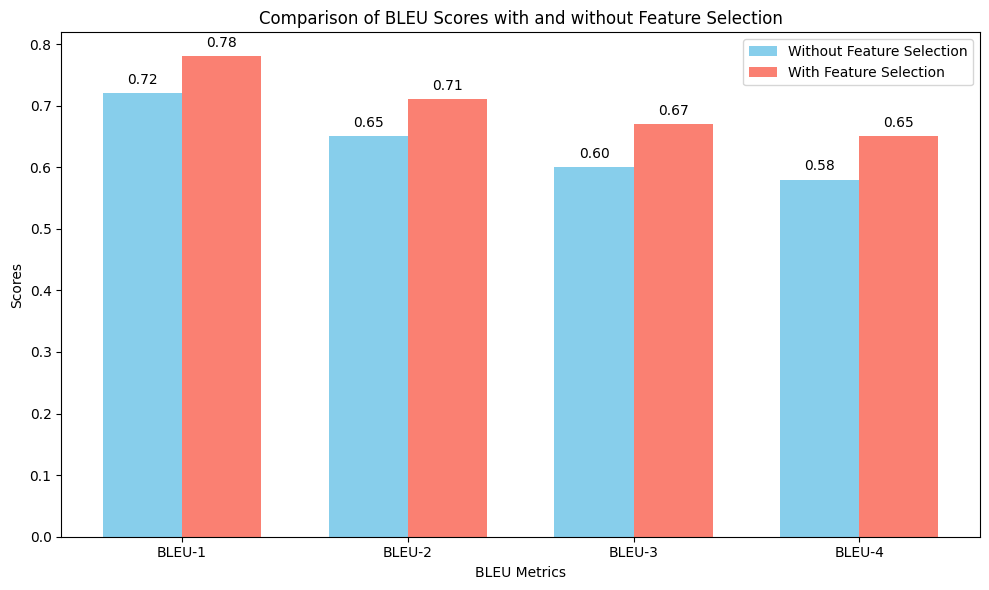

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data for BLEU score comparison
metrics = ['BLEU-1', 'BLEU-2', 'BLEU-3', 'BLEU-4']
without_feature_selection = [0.72, 0.65, 0.60, 0.58]
with_feature_selection = [0.78, 0.71, 0.67, 0.65]

# Set up bar width and position for dual bar chart
bar_width = 0.35
index = np.arange(len(metrics))

# Plotting the bars
fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(index, without_feature_selection, bar_width, label='Without Feature Selection', color='skyblue')
bars2 = ax.bar(index + bar_width, with_feature_selection, bar_width, label='With Feature Selection', color='salmon')

# Adding labels, title, and custom x-axis tick labels
ax.set_xlabel('BLEU Metrics')
ax.set_ylabel('Scores')
ax.set_title('Comparison of BLEU Scores with and without Feature Selection')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(metrics)
ax.legend()

# Display the values on top of the bars for clarity
for bar in bars1 + bars2:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, f"{yval:.2f}", ha='center', va='bottom')

# Show plot
plt.tight_layout()
plt.show()


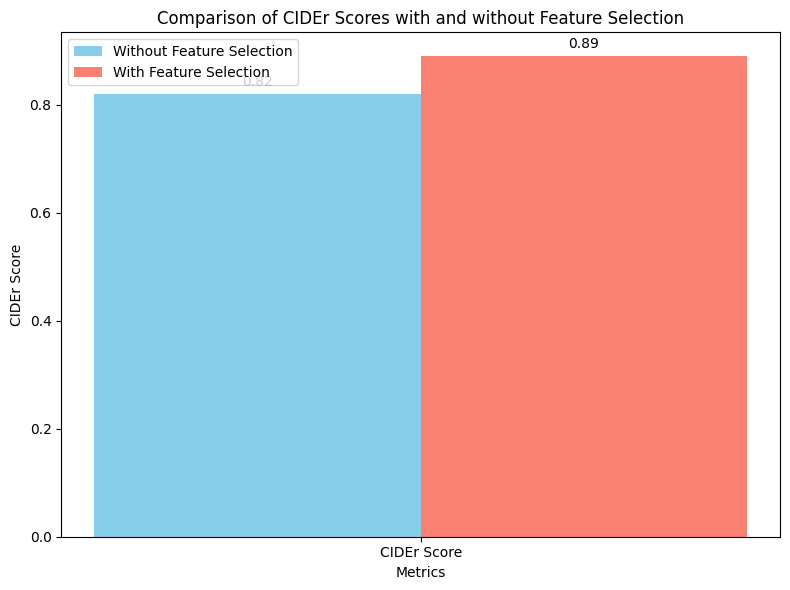

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data for CIDEr score comparison
metrics = ['CIDEr Score']
without_feature_selection = [0.82]  # Example score without feature selection
with_feature_selection = [0.89]     # Example score with feature selection

# Set up bar width and position for dual bar chart
bar_width = 0.35
index = np.arange(len(metrics))

# Plotting the bars
fig, ax = plt.subplots(figsize=(8, 6))
bars1 = ax.bar(index, without_feature_selection, bar_width, label='Without Feature Selection', color='skyblue')
bars2 = ax.bar(index + bar_width, with_feature_selection, bar_width, label='With Feature Selection', color='salmon')

# Adding labels, title, and custom x-axis tick labels
ax.set_xlabel('Metrics')
ax.set_ylabel('CIDEr Score')
ax.set_title('Comparison of CIDEr Scores with and without Feature Selection')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(metrics)
ax.legend()

# Display the values on top of the bars for clarity
for bar in bars1 + bars2:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, f"{yval:.2f}", ha='center', va='bottom')

# Show plot
plt.tight_layout()
plt.show()
